In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
smmh = pd.read_csv('smmh.csv')
smmh.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [19]:
new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_social_media_distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

smmh = smmh.rename(columns=new_column_names)
smmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   timestamp                           481 non-null    object 
 1   age                                 481 non-null    float64
 2   gender                              481 non-null    object 
 3   relationship_status                 481 non-null    object 
 4   occupation_status                   481 non-null    object 
 5   affiliated_organizations            451 non-null    object 
 6   use_social_media                    481 non-null    object 
 7   social_media_platforms              481 non-null    object 
 8   daily_social_media_time             481 non-null    object 
 9   frequency_social_media_no_purpose   481 non-null    int64  
 10  frequency_social_media_distracted   481 non-null    int64  
 11  restless_without_social_media       481 non-n

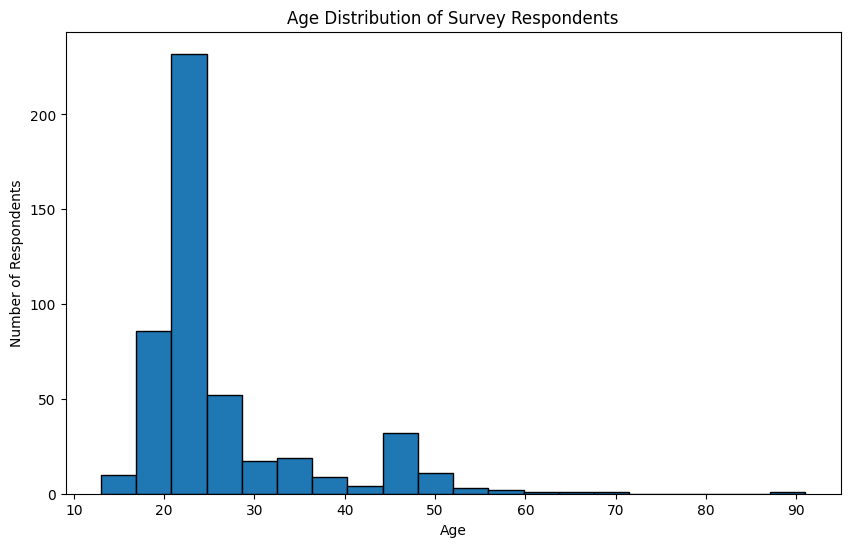

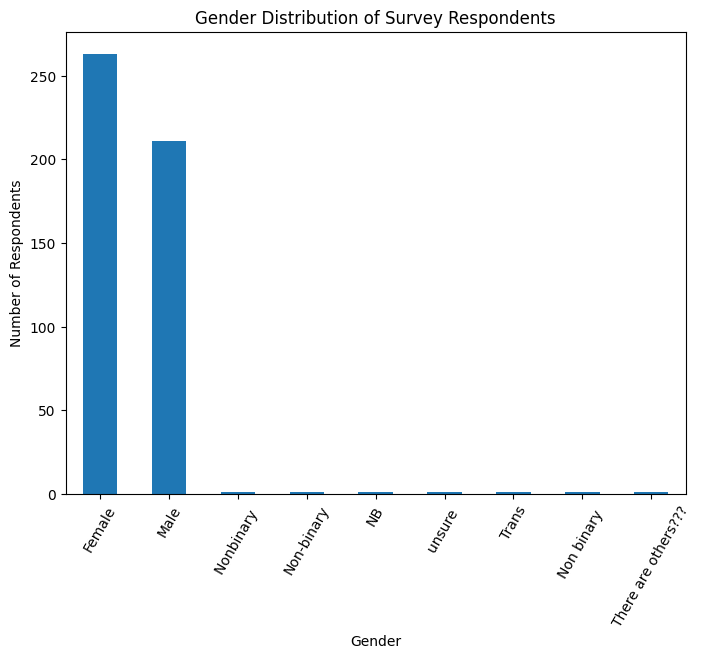

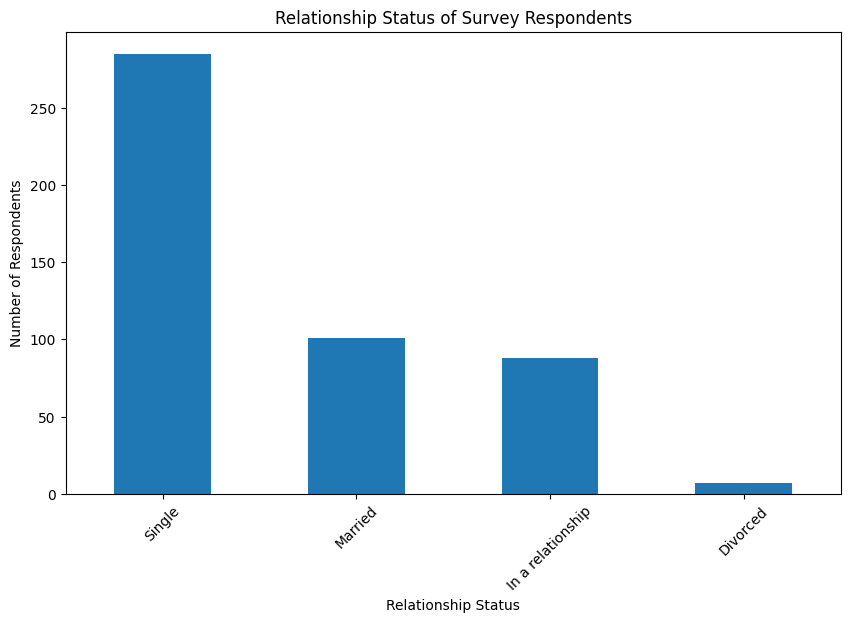

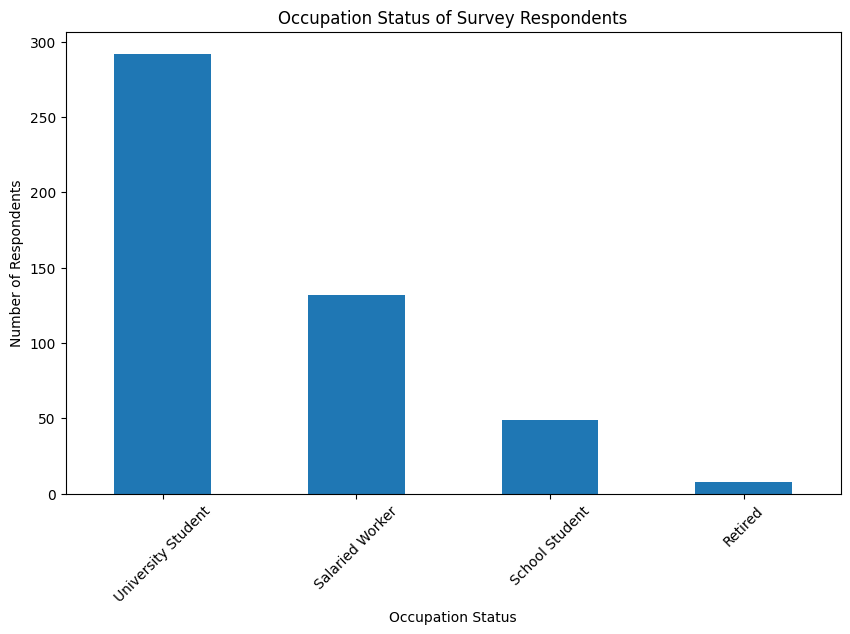

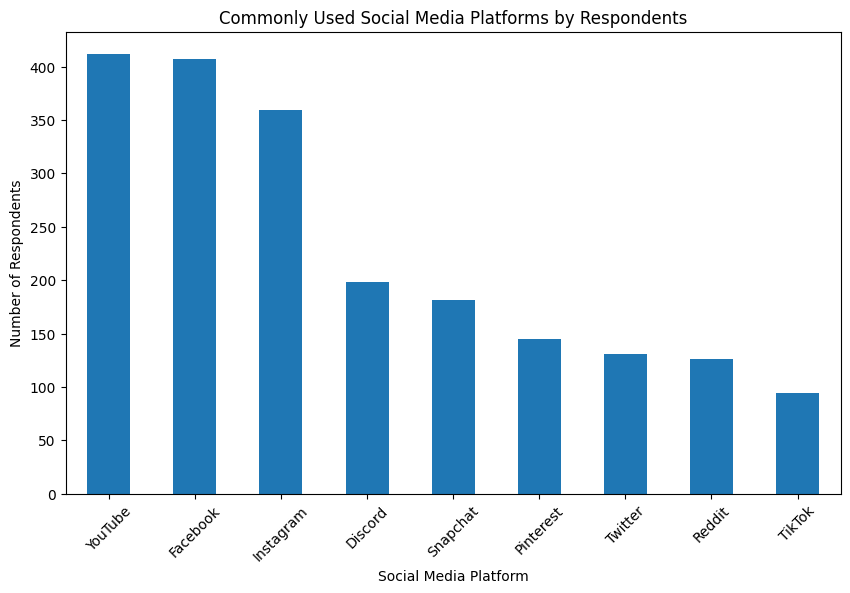

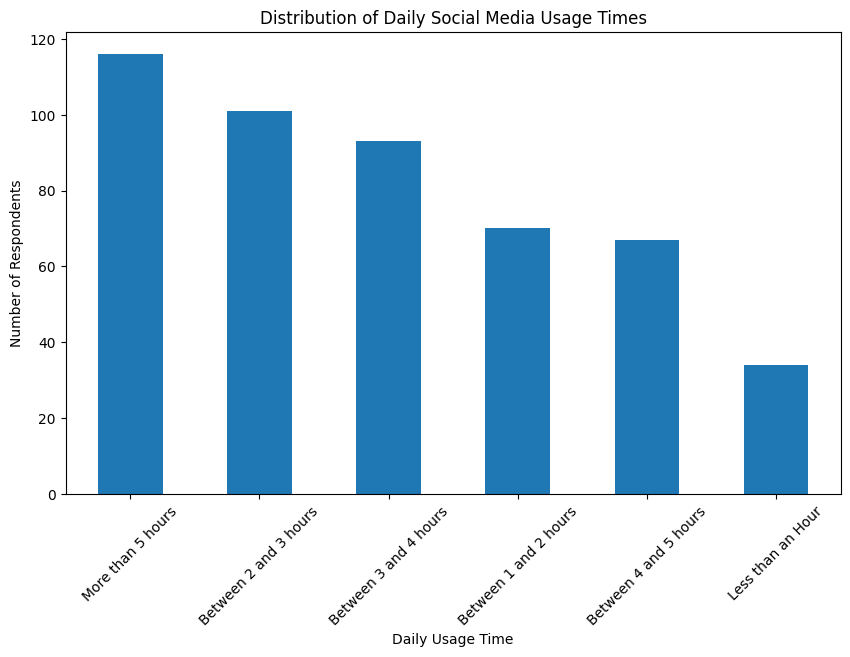

In [22]:
average_age = smmh['age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(smmh['age'], bins=20, edgecolor='k')
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

gender_distribution = smmh['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution of Survey Respondents')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=60)
plt.show()

relationship_statuses = smmh['relationship_status'].value_counts()

plt.figure(figsize=(10, 6))
relationship_statuses.plot(kind='bar')
plt.title('Relationship Status of Survey Respondents')
plt.xlabel('Relationship Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

occupation_statuses = smmh['occupation_status'].value_counts()

plt.figure(figsize=(10, 6))
occupation_statuses.plot(kind='bar')
plt.title('Occupation Status of Survey Respondents')
plt.xlabel('Occupation Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

social_media_platforms = smmh['social_media_platforms'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
social_media_platforms.plot(kind='bar')
plt.title('Commonly Used Social Media Platforms by Respondents')
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

daily_usage_distribution = smmh['daily_social_media_time'].value_counts()

plt.figure(figsize=(10, 6))
daily_usage_distribution.plot(kind='bar')
plt.title('Distribution of Daily Social Media Usage Times')
plt.xlabel('Daily Usage Time')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()